# Python Data Mining Quick Start Guide
## Ch 2 - Basic Terminology and our End-to-end Example
### Copyright: Nathan Greeneltch, PhD 2019

#### These code examples and description are meant to accompany the book "Python Data Mining Quick Start Guide" by Nathan Greeneltch. For full background on the topics and introduction sections, please purchase the book. 


Let's start with a full end-to-end example demonstrating the topics and strategies covered in the rest of the book. Subsequent chapters will go further into detail on each part of the analytical process. I suggest you read through this example fully before moving on in the book. 


### Load Data Into Memory: View and Manage with Ease Using Pandas
First we will need to load data into memory so python can interact with it. Pandas will be our data management and manipulation library.


In [1]:
# load data into Pandas
import pandas as pd
df = pd.read_csv("./data/iris.csv")

Let's use some built-in pandas features to do sanity checks on our data load and make sure we've loaded everything properly. First we use the **.shape** attribute to check size of data printed as (rows, columns). Next we sanity check the contents of the dataframe with the **.head()** method which return the first five lines in a new smaller dataframe for easy viewing. Finally we can use the **.describe()** method to show some summary statistics for each feature. 
NOTE: Pandas has many more sanity check and quick view features. For example, **.tail()** will return the final 5 lines of the data. Becoming proficient in Pandas is undoubtedly worth the time investment. The dedicated chapter later in the book is a good place to start, as well as the "Essential Basic Functionality" page (https://pandas.pydata.org/pandas-docs/stable/basics.html) on the Pandas doc site.

In [6]:
# sanity check with Pandas
print("shape of data in (rows, columns) is " + str(df.shape))
print(df.head())
df.describe().transpose()

shape of data in (rows, columns) is (150, 5)
   sepal length in cm  sepal width in cm  petal length in cm  \
0                 5.1                3.5                 1.4   
1                 4.9                3.0                 1.4   
2                 4.7                3.2                 1.3   
3                 4.6                3.1                 1.5   
4                 5.0                3.6                 1.4   

   petal width in cm species  
0                0.2  setosa  
1                0.2  setosa  
2                0.2  setosa  
3                0.2  setosa  
4                0.2  setosa  


,count,mean,std,min,25%,50%,75%,max
sepal length in cm,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal width in cm,150.0,3.054000,0.433594,2.0,2.8,3.00,3.3,4.4
petal length in cm,150.0,3.758667,1.764420,1.0,1.6,4.35,5.1,6.9
petal width in cm,150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5


### Plot and Explore Data: Harness the Power of Seaborn
Now let's start our analysis with Seaborn's canned plotting routine called **pairplot** to visualize pairwise feature relationships. You can use this routine to hunt down relationships, candidates for groupings, possible outliers, and intuition for what downstream strtegies to investigate for analysis. Each off-diagonal cell is a pairwise scatter plot and the diagonals are filed with univariate distributions.

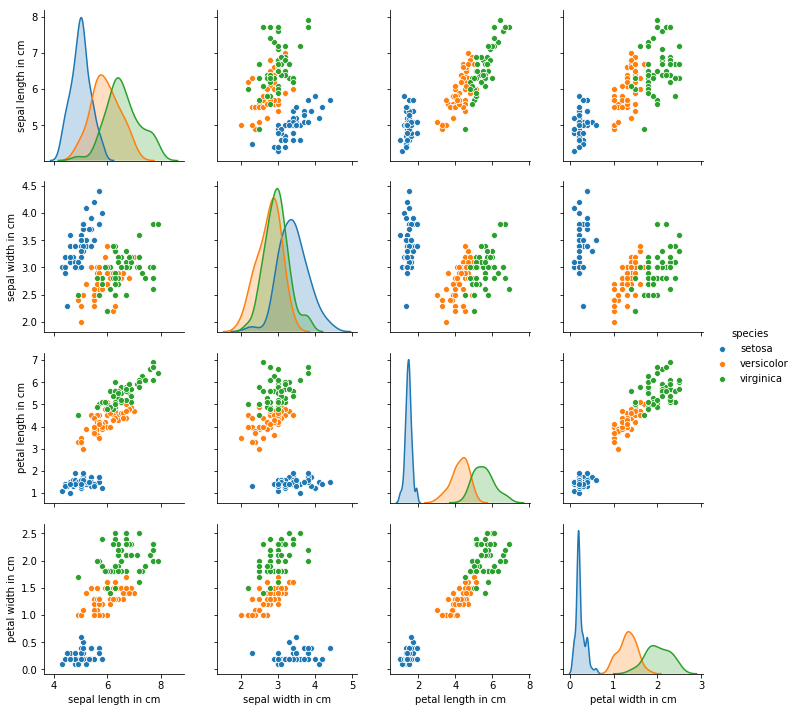

In [8]:
# explore with Seaborn pairplot
import seaborn as sns
sns.pairplot(df,hue='species')

Sometimes a histogram is easier than probability density plots for understanding a distribution. With Seaborn, we can easily pass the **diag_kind** arg and re-plot to view the histograms in the diagonals. Also, we can change the aesthetics with **palette** and **markers** args. See the Seaborn docs for more available args. Let's do the re-plot now:

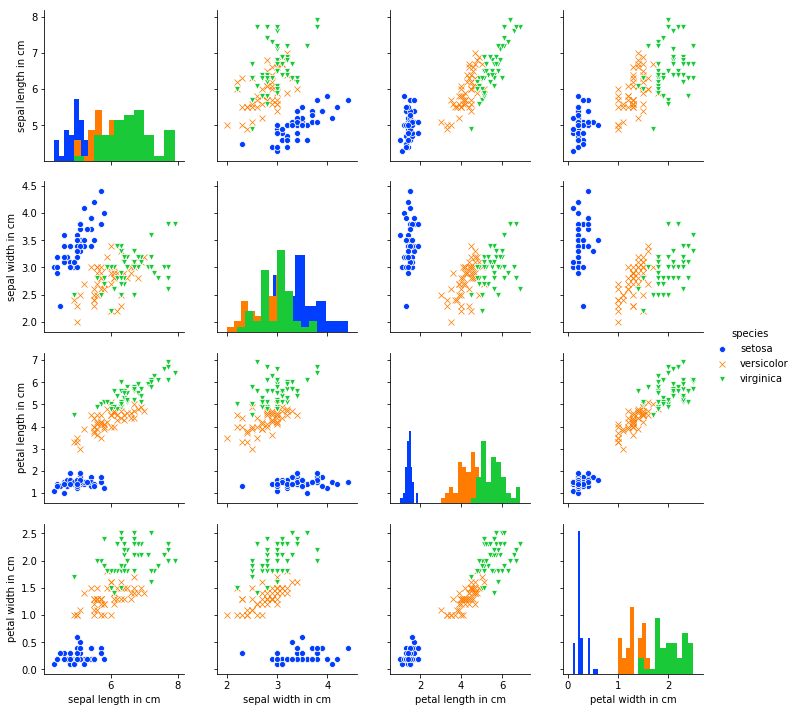

In [10]:
# add histograms to diagonals of Seaborn pairplot
sns.pairplot(df,hue='species',diag_kind='hist',
             palette='bright',markers=['o','x','v'])

At this point, we can choose two variables and plot them in a scatter plot with Seaborn's **lmplot**. If your data set has more than five features, important variable relationships may not be shown on the same window of the pair plot. You can use this bivariate scatter plot to isolate and view important pairings.

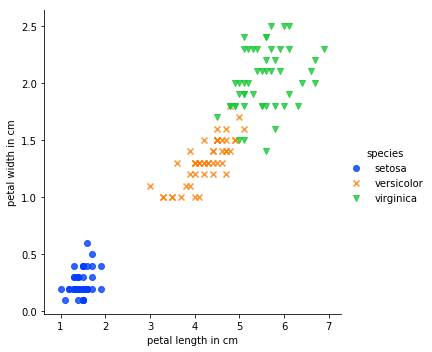

In [11]:
# plot bivariate scatter with Seaborn
sns.lmplot(x='petal length in cm', y='petal width in cm', 
           hue="species", data=df, fit_reg=False,
           palette='bright',markers=['o','x','v'])

A popular quick-view of a single feature vector is a **violin plot**. Many practitioners prefer violins for understanding of raw values distribution and class spread in a single plot. Each violin is actually the univariate distribution, displayed as probability density, of values within a given class plotted vertically like a box plot. This concept probably sounds convoluted, but one look at the plot should get the idea across with ease, and that's the idea. The more violin plots you see, the more you will learn to love them. 

NOTE: By default Seaborn will add the  median and interquartile range (middle 50%) to each violin in the plot. You can change this by using the **inner** arg. It is explained in the Seaborn online documentation for violin plot. 

In [ ]:
sns.violinplot(x='species',y='petal length in cm', data=df)

### Transform Data: PCA and LDA with Scikit-learn
Often a transformation can make data more digestible. In particular, data scientists use transformations to rotate the data about the axis of most overall or most important variation with the aim of representing similar information in a lower number of dimensions. We can use the iris data set as an example to take four features and represent similar information in two dimensions. Let's start with **principal component analysis (PCA)** to orient the data onto the axes of highest variation. The iris set only has four dimensions, but this technique can be used on data with tens or hundreds of features. 

In [18]:
# reduce dimensions with PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
out_pca = pca.fit_transform(df[['sepal length in cm',
                                'sepal width in cm',
                                'petal length in cm',
                                'petal width in cm']])

Now let's create a pandas dataframe with the output data, and use the **head()** sanity check to see what we have:

In [19]:
df_pca = pd.DataFrame(data = out_pca, columns = ['pca1', 'pca2'])
print(df_pca.head())

       pca1      pca2
0 -2.684207  0.326607
1 -2.715391 -0.169557
2 -2.889820 -0.137346
3 -2.746437 -0.311124
4 -2.728593  0.333925


This looks good, except we are missing the target or label column ("species"). Let's add the column by concatenating with the original dataframe. This gives us a pca dataframe ("df_pca") that is ready for downstream work and predictions. Then let's plot and see what how our transformed data looks plotted on just two dimensions now. 

       pca1      pca2 species
0 -2.684207  0.326607  setosa
1 -2.715391 -0.169557  setosa
2 -2.889820 -0.137346  setosa
3 -2.746437 -0.311124  setosa
4 -2.728593  0.333925  setosa


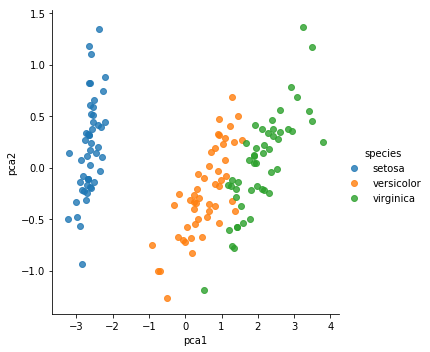

In [20]:
df_pca = pd.concat([df_pca, df[['species']]], axis = 1)
print(df_pca.head())
sns.lmplot(x="pca1", y="pca2", hue="species", data=df_pca, fit_reg=False)

We now have our higher dimensional data represented in two easily digestible and plot-able dimensions. But can we do better? The goal of PCA is to orient the data in the direction of the greatest variation. However, it ignores some important information from our data set. Namely, the labels are not used. Maybe we can extract even better transformation vectors if we include the labels. The most popular labeled dimension reduction technique is called **linear discriminant analysis (LDA)**. The math underneath will group by class labels, and then find the direction of most separation between the classes.   

NOTE: Ignoring labels in the transformation step may be desirable for some problem statements, especially those with unreliable class labels, to avoid pulling the reduced components vectors in an unhelpful direction. For this reason, I recommend to always start with PCA, before deciding if I need further  work or not.  Indeed unless your data set is large, the computation time for PCA is short, so there's no harm in starting here. 

       lda1      lda2 species
0 -8.084953  0.328454  setosa
1 -7.147163 -0.755473  setosa
2 -7.511378 -0.238078  setosa
3 -6.837676 -0.642885  setosa
4 -8.157814  0.540639  setosa


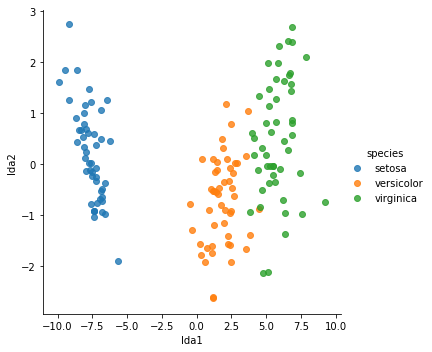

In [21]:
# reduce dimensions with LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(n_components=2)

# format dataframe
out_lda = lda.fit_transform(X=df.iloc[:,:4], y=df['species'])
df_lda = pd.DataFrame(data = out_lda, columns = ['lda1', 'lda2'])
df_lda = pd.concat([df_lda, df[['species']]], axis = 1)

# sanity check
print(df_lda.head())

# plot
sns.lmplot(x="lda1", y="lda2", hue="species", data=df_lda, fit_reg=False)

The scatter plots may tempt you into thinking the PCA and LDA techniques performed the same transformation on the data. Let's look a little closer at the first component of each using the powerful violin plot routine. First we will begin with PCA:

Text(0.5,1,'Violin plot: Feature = PCA_1')

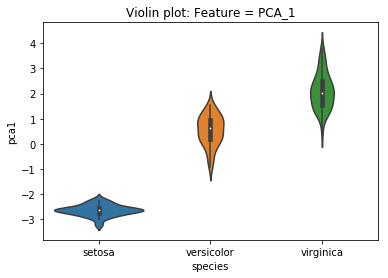

In [22]:
sns.violinplot(x='species',y='pca1', data=df_pca).set_title("Violin plot: Feature = PCA_1")

Now let's plot the first LDA component:

Text(0.5,1,'Violin plot: Feature = LDA_1')

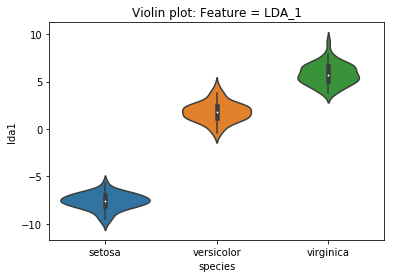

In [24]:
sns.violinplot(x='species',y='lda1', data=df_lda).set_title("Violin plot: Feature = LDA_1")

### Quantify Separation: K-means Clustering and Silhouette Score
The most difficult class separation in this data set is "versicolor" and "virginica". The violins for each of these classes tells us that the two techniques actually produce different results. Using the "setosa" distribution as a reference in both plots, the LDA versicolor distribution is tighter (wider and shorter) than the PCA one, causing its interquartile range to be further separated from the interquartile range of the virginica distribution. If this analysis is not rigorous enough for you, we can easily quantify this difference by using a clustering algorithm on the data. Let's use the **k-means** clustering algorithm to mathematically group the data together, and then use the quantitative metric called **silhouette coefficient** to score the tightness of the resulting clusters. A higher score means tighter clusters. Since the k-means algorithm is very straightforward and the quality of the grouping is directly related to the quality of the input data, tighter clusters proves that the input features separate the classes better. 

In [25]:
# cluster With k-means and check silhouette score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# initialize k-means algo object
kmns = KMeans(n_clusters=3, random_state=42)

# fit algo to pca and find silhouette score
out_kms_pca = kmns.fit_predict(out_pca)
silhouette = silhouette_score(out_pca, out_kms_pca)
print("PCA silhouette score = " + str(silhouette))

# fit algo to lda and find silhouette score
out_kms_lda = kmns.fit_predict(out_lda)
silhouette = silhouette_score(out_lda, out_kms_lda)
print("LDA silhouette score = %2f " % silhouette)

PCA silhouette score = 0.5975649100584399
LDA silhouette score = 0.656399 


The output above shows that the LDA classes are better separated. This makes sense because the LDA function had more information, namely the classes to be separated. 

### Make Decision or Prediction
Before we build a prediction, we need to separate our data into training and test sets. Model validation is a large and very important topic that will be covered later in the book, but for the purpose of this end-to-end example we will do a basic train-test split. We will then build the prediction model on the train data and score it on the test data using F1 score. 

NOTE: I recommend using a random seed for most randomized data selection. This seed tells the  pseudo-random number generator  where to begin its randomization routine. The result is the same random choice every time. In this example I've used the random seed when splitting into test and train sets. Now if I stop working on the project and pick it back up later, I can split with the random seed and get the exact same train and test sets.  I used "42" for my seed as it is common in the field due to the popularity of "The Hitchhiker's Guide to the Galaxy" series by Douglas Adams.

In [26]:
# Split into train/validation/test set
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df_lda, test_size=0.3, random_state=42)

# Sanity check
print('train set shape = ' + str(df_train.shape))
print('test set shape = ' + str(df_test.shape))
print(df_train.head())

train set shape = (105, 3)
test set shape = (45, 3)
         lda1      lda2     species
81   0.598443 -1.923348  versicolor
133  3.809721 -0.934519   virginica
137  4.993563  0.184883   virginica
75   1.439522 -0.123147  versicolor
109  6.872871  2.694581   virginica


Now we can move on to prediction. Let's first try a **Support Vector Machine (SVM)** using the **SVC** module. Notice how the classifier objects in Scikit-learn have similar API calls to the PCA and LDA transforms from earlier. So once you get the main idea of the library down, you can learn how to apply different transformation, classifiers, or other methods will very little effort. 

In [27]:
# classify with SVM
from sklearn.svm import SVC
from sklearn.metrics import f1_score
clf = SVC(kernel='rbf', C=0.8, gamma=10)
clf.fit(df_train[['lda1', 'lda2']], df_train['species'])

# predict on test set
y_pred = clf.predict(df_test[['lda1', 'lda2']])
f1 = f1_score(df_test['species'], y_pred, average='weighted')

# check prediction score
print("f1 score for SVM classifier = %2f " % f1)

f1 score for SVM classifier = 0.788061 


The F1 score for this classifier is 0.79 as calculated on the test set. At this point we can try to change a model setting and fit again. The C parameter was set to 0.8 in our first run, using the "C=0.8" arg in the instantiation of the "clf" object. C is a penalty term and called a **hyperparameter**, meaning it is a setting an analyst can use to steer a fit in a certain direction. Here we will use the penalty hyperparameter C to tune the model towards better prediction. Let's change it from 0.8 to 1, effectively raising the penalty term. 

NOTE: C is the penalty term in an SVM. It controls how large the penalty is for mis-classed example internally during the model fit.  For a utilitarian understanding, it is called the "soft margin penalty" because it tunes how hard/soft the resulting separation line is drawn. Common hyperparameters for support vector machines will be covered in more details in a later chapter. 

In [28]:
# classify with SVM
from sklearn.svm import SVC
from sklearn.metrics import f1_score
clf = SVC(kernel='rbf', C=1, gamma=10)
clf.fit(df_train[['lda1', 'lda2']], df_train['species'])
y_pred = clf.predict(df_test[['lda1', 'lda2']])
f1 = f1_score(df_test['species'], y_pred, average='weighted')
print("f1 score for SVM classifier = %2f " % f1)

f1 score for SVM classifier = 0.851366 


The F1 score for this classifier is now 0.85. The obvious next step is to tune the parameters and maximize the F1 score. Of course it would be very tedious to change a parameter, refit, analyze, repeat, ..etc. Instead you can employ a **grid search** to automate this parameterization. Grid search and **cross-validation** will be covered in detail in later chapters. An alternative method to employing grid-search, is to choose an algorithm that doesn't require tuning. A popular algorithm that requires little-to-no tuning is **Random Forest**. The "forest" refers to how the method adds together multiple decision trees into a voted prediction.

In [29]:
# classify with RF
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=2, random_state=42)
clf.fit(df_train[['lda1', 'lda2']], df_train['species'])
y_pred = clf.predict(df_test[['lda1', 'lda2']])
f1 = f1_score(df_test['species'], y_pred, average='weighted')

# check prediction score
print("f1 score for SVM classifier = %2f " % f1)

f1 score for SVM classifier = 0.955291 


The F1 score for this classifier is 0.96, right out of the box with no tuning. The Random Forest Method will be discussed in more detail in later chapters. 